# Exercícios de mosaico de gráficos

Considere os dados da primeira célula para um aplicativo de uma pequena empresa de software. Faça um mosaico com 4 gráficos:

1. Gráfico de linhas com os novos usuários por mês
2. Gráfico de barras com a receita mensal
3. Gráfico de linhas com os usuários ativos diários
4. Gráfico de barras empilhadas com os tickets de suporte abertos e fechados

Os gráficos 1 e 2 devem ter uma linha própria no mosaico. Os gráficos 3 e 4 devem compartilhar a mesma linha.


In [20]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
novos_usuarios = [100, 80, 110, 140, 150, 160, 170, 120, 110, 150, 200, 140]
usuarios_ativos_diarios = [1000, 750, 900, 1300, 1400, 1500, 1200, 1200, 1500, 1900, 2000, 1800]
receita_mensal = [10000, 8500, 9800, 10000, 11000, 12000, 10000, 10500, 13000, 13000, 20000, 17000]
tickets_suporte_abertos = [110, 75, 100, 140, 170, 160, 100, 130, 190, 200, 210, 140]
tickets_suporte_fechados = [100, 85, 100, 120, 130, 150, 140, 110, 130, 120, 150, 200]


In [26]:
import matplotlib.pyplot as plt
from cycler import cycler

# rc = runtime configuration (configuração quando executa)
cores = plt.get_cmap('Set1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)


<function matplotlib.pyplot.show(close=None, block=None)>

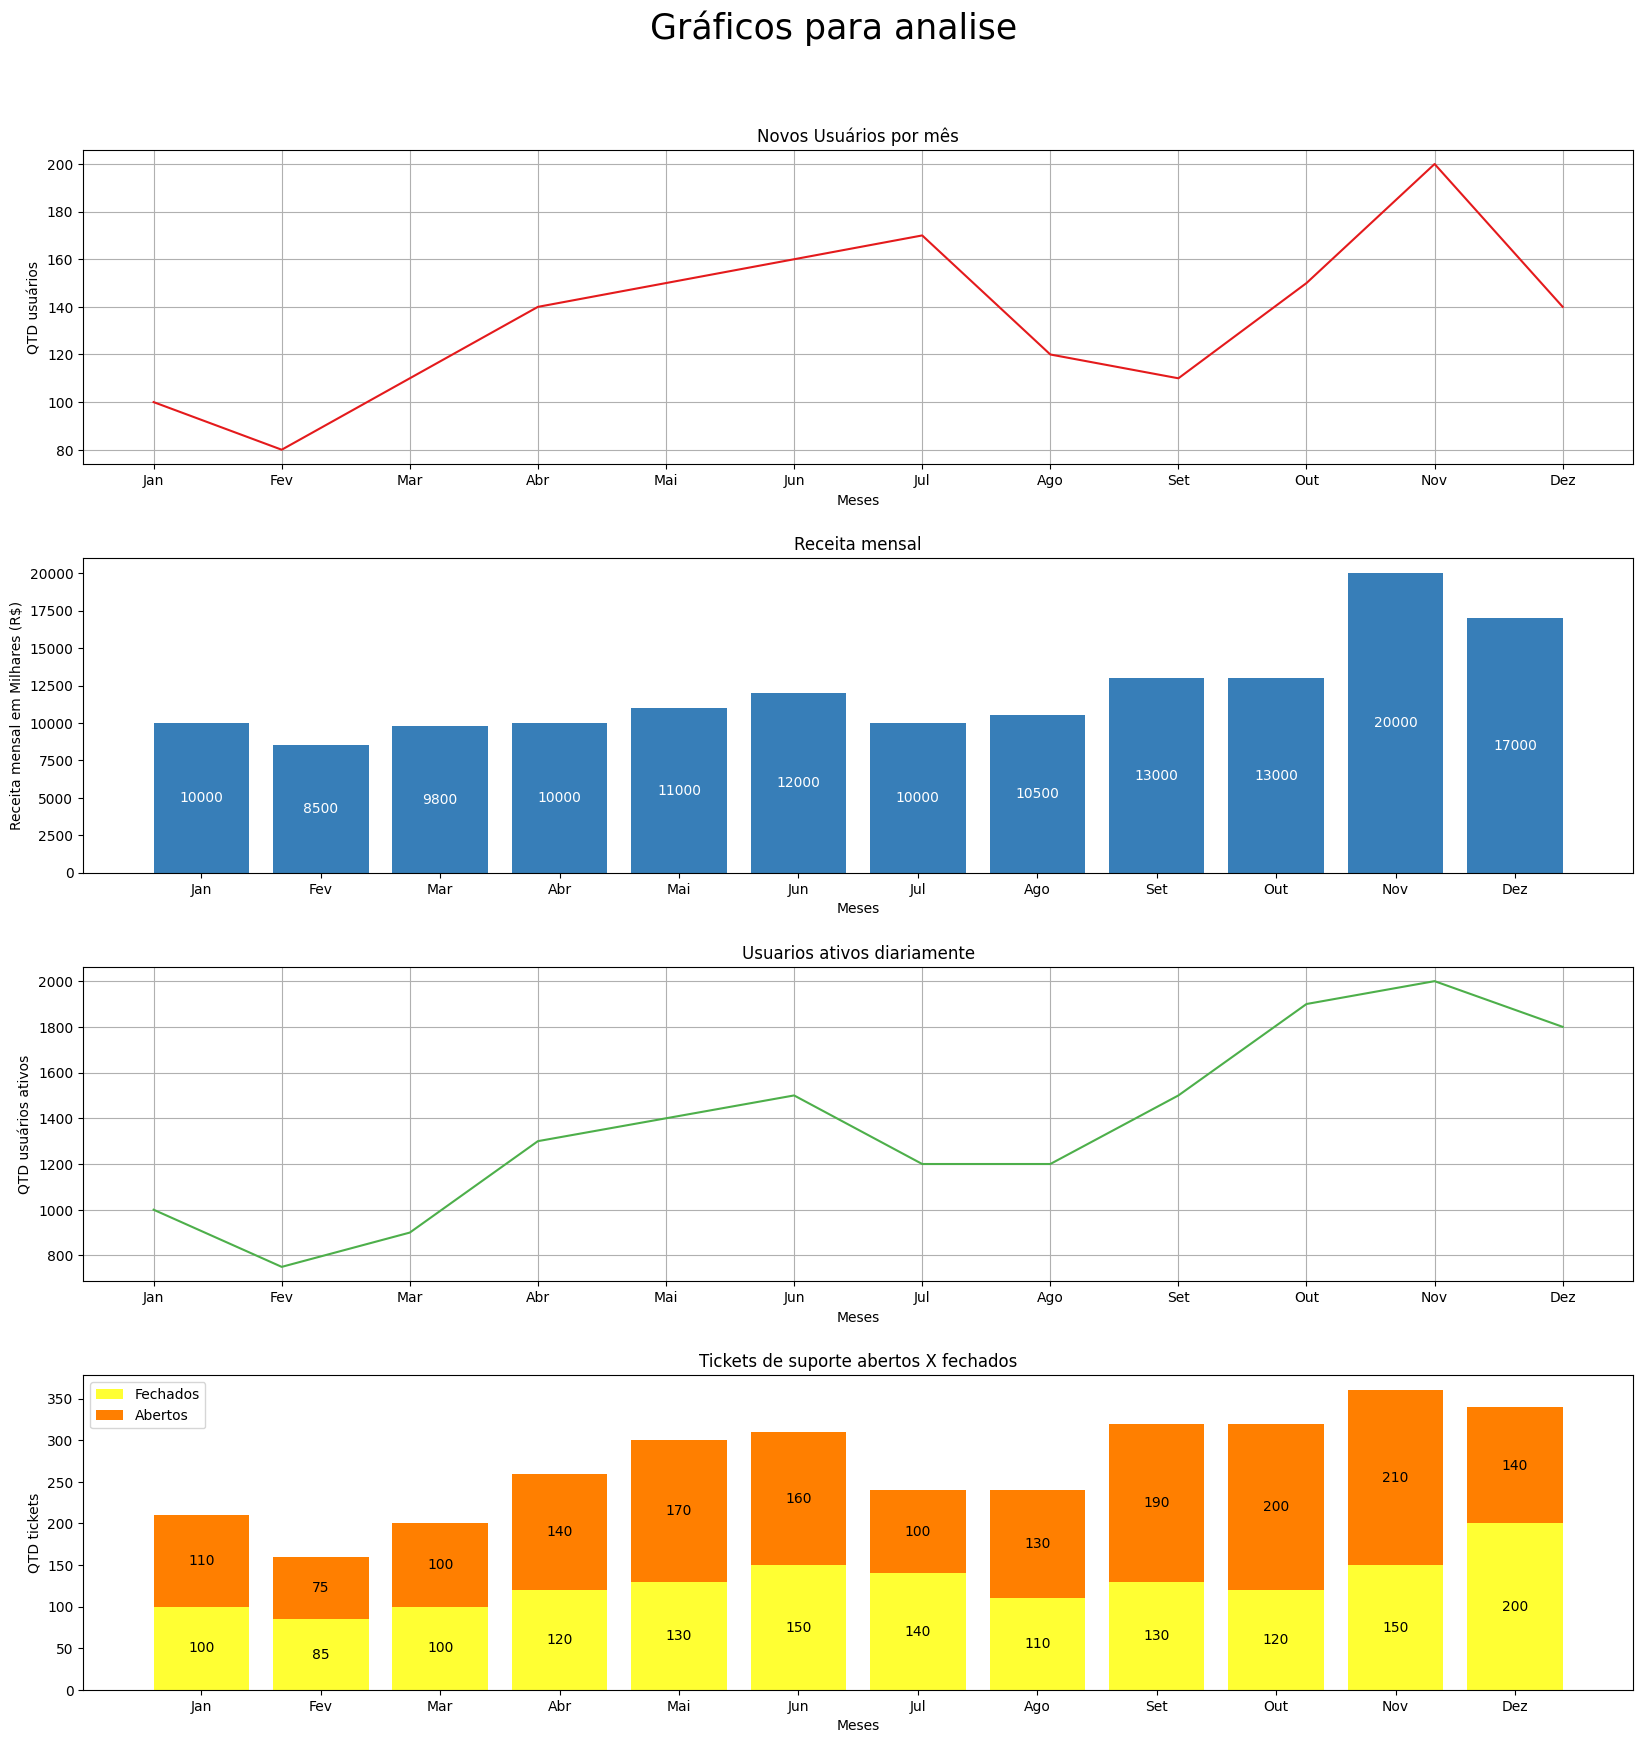

In [38]:
mosaico = 'A;B;C;D'
espacamento = {'wspace':0.3,'hspace':0.3}
fig = plt.figure(figsize=(20,20))
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

fig.suptitle('Gráficos para analise', fontsize=25, y=0.95)
             
# Figura 1

axs['A'].plot(meses, novos_usuarios)
axs['A'].set_title('Novos Usuários por mês')
axs['A'].set_ylabel('QTD usuários')
axs['A'].set_xlabel('Meses')

axs['A'].grid(True)

# Figura 2

barras = axs['B'].bar(meses, receita_mensal, color=cores[1])
plt.bar_label(barras, label_type= 'center', color= 'white')
axs['B'].set_title('Receita mensal')
axs['B'].set_ylabel('Receita mensal em Milhares (R$)')
axs['B'].set_xlabel('Meses')

# Figura 3

axs['C'].plot(meses, usuarios_ativos_diarios, color=cores[2])
axs['C'].set_title('Usuarios ativos diariamente')
axs['C'].set_xlabel('Meses')
axs['C'].set_ylabel('QTD usuários ativos')

axs['C'].grid(True)

# Figura 4

barras1 = axs['D'].bar(meses, tickets_suporte_fechados, color=cores[5], label = 'Fechados')
plt.bar_label(barras1, label_type= 'center')
barras2 = axs['D'].bar(meses, tickets_suporte_abertos, bottom=tickets_suporte_fechados, color = cores[4], label='Abertos')
plt.bar_label(barras2, label_type= 'center')
axs['D'].set_title('Tickets de suporte abertos X fechados')
axs['D'].set_xlabel('Meses')
axs['D'].set_ylabel('QTD tickets')
plt.legend()

plt.show